## Neural Network for spiral data set

In this notebook we’ll walk through a complete implementation of a toy Neural Network in 2 dimensions. We first implement a simple linear classifier and then extend the code to a 2-layer Neural Network to get good result.

Generating a classifation  dataset that is not easily linearly separable. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X shape : (300, 2)


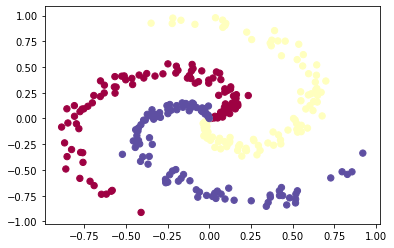

In [66]:
N=100 #number of points per class
D =2 #dimensionality
K=3 #number of classes
X=np.zeros((N*K,D))
print('X shape :', X.shape) #data matrix
y = np.zeros(N*K, dtype='uint8') #label class
for j in range(K):
    ix=range(N*j, N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4, (j+1)*4,N) + np.random.randn(N)*0.2 #theta
    X[ix] = np.c_[r*np.cos(t), r*np.sin(t)]
    y[ix]=j
    
# visualize the data
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

We have spiral data consists of 3 classes (bleu, red, yellow) that are not linearly separable.

### Training a Softmax Linear Classifier

**Initialize the parameters**

Lets first train a Softmax classifier on this classification dataset. We know that the Softmax classifier has a linear score function and uses the cross-entropy loss. The parameters of the linear classifier consist of a weight matrix W and a bias vector b for each class. Lets first initialize these parameters to be random numbers:

In [67]:
## initialize parameters randomly

W=0.01*np.random.randn(D,K)
b=np.zeros((1,K))
print('shape of W: ',W.shape)
print('shape of b: ',b.shape)

shape of W:  (2, 3)
shape of b:  (1, 3)


**Compute the class scores**

Since this is a linear classifier, we can compute all class scores very simply in parallel with a single matrix multiplication:

In [68]:
## compute the class scores

scores = np.dot(X,W)+b

scores.shape

(300, 3)

Given the array of scores we’ve computed above, we can compute the loss. First, the way to obtain the probabilities is straight forward:

In [69]:
num_examples = X.shape[0]
print(num_examples)
#get unnormalized probabilities
exp_scores = np.exp(scores)
#normalize them for each example
probs = exp_scores/np.sum(exp_scores, axis =1, keepdims = True)

300


We now have an array probs of size [300 x 3], where each row now contains the class probabilities. In particular, since we’ve normalized them every row now sums to one. We can now query for the log probabilities assigned to the correct classes in each example:

In [70]:
correct_logprobs = -np.log(probs[range(num_examples),y])
#correct_logprobs 

The array correct_logprobs is a 1D array of just the probabilities assigned to the correct classes for each example. The full loss is then the average of these log probabilities and the regularization loss:



In [71]:
#compute the loss: average cross-entropy loss and regularization
reg = 0.01
data_loss = np.sum(correct_logprobs)/ num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss+reg_loss

In [72]:
loss

1.0937446112801341

Since the loss=1.09 and with small initial random weights,  we now want to make the loss as low as possible, with loss = 0 as the absolute lower bound. But the lower the loss is, the higher are the probabilities assigned to the correct classes for all examples.

**Computing the Analytic Gradient with Backpropagation**

We have a way of evaluating the loss, and now we have to minimize it. We’ll do so with gradient descent. That is, we start with random parameters (as shown above), and evaluate the gradient of the loss function with respect to the parameters, so that we know how we should change the parameters to decrease the loss. Lets introduce the intermediate variable p, which is a vector of the (normalized) probabilities.

In [73]:
dscores = probs
dscores[range(num_examples), y] -=1
dscores /=num_examples
dscores.shape

(300, 3)

Lastly, we had that scores = np.dot(X, W) + b, so armed with the gradient on scores (stored in dscores), we can now backpropagate into W and b:

In [74]:
dW=np.dot(X.T, dscores)
db = np.sum(dscores, axis =0, keepdims=True)
dW += reg*W

**Performing a parameter update**

Now that we’ve evaluated the gradient we know how every parameter influences the loss function. We will now perform a parameter update in the negative gradient direction to decrease the loss:

In [75]:
#perform a parameter update
step_size = 0.01
W +=-step_size *dW
b +=-step_size*db

In [76]:
for i in range(200):
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 
  
  # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print ("iteration %d: loss %f" % (i, loss))
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    

iteration 0: loss 1.093441
iteration 10: loss 1.090431
iteration 20: loss 1.087460
iteration 30: loss 1.084528
iteration 40: loss 1.081633
iteration 50: loss 1.078777
iteration 60: loss 1.075957
iteration 70: loss 1.073175
iteration 80: loss 1.070428
iteration 90: loss 1.067717
iteration 100: loss 1.065041
iteration 110: loss 1.062399
iteration 120: loss 1.059792
iteration 130: loss 1.057218
iteration 140: loss 1.054678
iteration 150: loss 1.052171
iteration 160: loss 1.049695
iteration 170: loss 1.047252
iteration 180: loss 1.044840
iteration 190: loss 1.042459


In [77]:
#evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))


training accuracy: 0.50


(-1.9126420576739482, 1.9673579423260552)

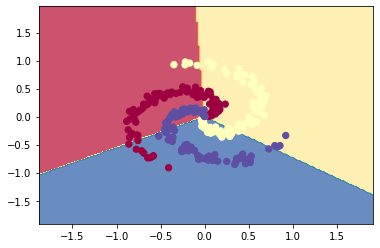

In [78]:

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')



This prints 52%. Not very good at all, but also not surprising given that the dataset is constructed so it is not linearly separable. 


### Training a Neural Network

Clearly, a linear classifier is inadequate for this dataset and we would like to use a Neural Network. One additional hidden layer will suffice for this toy data. We will now need two sets of weights and biases (for the first and second layers):

In [79]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2


iteration 0: loss 1.098591
iteration 1000: loss 0.297852
iteration 2000: loss 0.275707
iteration 3000: loss 0.256648
iteration 4000: loss 0.252818
iteration 5000: loss 0.250269
iteration 6000: loss 0.247870
iteration 7000: loss 0.245616
iteration 8000: loss 0.244632
iteration 9000: loss 0.243946


In [80]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))


training accuracy: 0.99


Which prints 98%!. We can also visualize the decision boundaries:

(-1.9126420576739482, 1.9673579423260552)

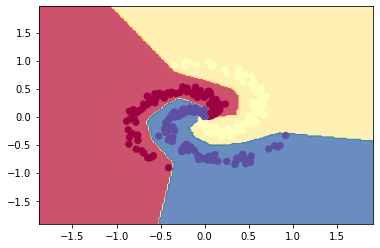

In [81]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

Thus, Neural Network classifier crushes the spiral dataset. 